In [5]:
!pip install livelossplot
from IPython.display import clear_output
clear_output()

In [6]:
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Input
from keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
import tensorflow as tf

import os, shutil, random

2024-05-14 21:06:27.091787: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 21:06:27.091851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 21:06:27.094135: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
#Checkpoints
if not os.path.exists("/kaggle/working/training"):
    os.mkdir("/kaggle/working//training")
checkpoint_path = "/kaggle/working/training/model.weights.h5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [8]:
cd /kaggle/input/handwritten-math-symbols/dataset

/kaggle/input/handwritten-math-symbols/dataset


In [9]:
symbols = os.listdir(".")
for sym in symbols:
    if sym != ".directory":
        print(f"in dir with sym {sym} there are {len(list(os.listdir(sym)))} images")

in dir with sym 7 there are 533 images
in dir with sym 2 there are 433 images
in dir with sym 5 there are 433 images
in dir with sym div there are 618 images
in dir with sym 8 there are 554 images
in dir with sym x there are 452 images
in dir with sym 0 there are 595 images
in dir with sym y there are 399 images
in dir with sym z there are 212 images
in dir with sym add there are 596 images
in dir with sym 3 there are 541 images
in dir with sym eq there are 634 images
in dir with sym dec there are 624 images
in dir with sym sub there are 655 images
in dir with sym 1 there are 562 images
in dir with sym 4 there are 526 images
in dir with sym 9 there are 547 images
in dir with sym mul there are 577 images
in dir with sym 6 there are 581 images


(150, 150, 3)


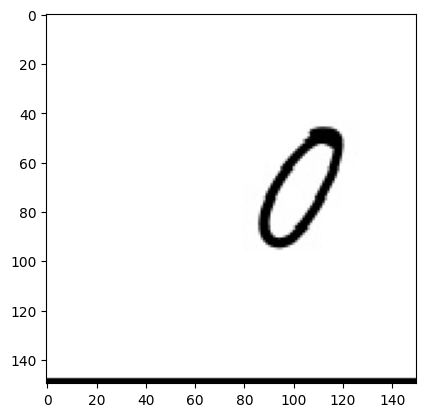

In [10]:
img = load_img("./0/13776.jpg", target_size=(150, 150))
print(img_to_array(img).shape)
plt.imshow(img); plt.show()

In [11]:
batch_size=32
seed=69

img_datagen = ImageDataGenerator(
    rescale=1./255.,
    data_format="channels_last",
    validation_split=0.15
)

train_gen = img_datagen.flow_from_directory(
    directory=".",
    target_size=(150, 150),
    color_mode="grayscale",
    batch_size=batch_size,
    shuffle=True,
    subset='training',
    save_format='jpg',
    seed=seed
)
valid_gen = img_datagen.flow_from_directory(
    directory=".",
    target_size=(150, 150),
    color_mode="grayscale",
    batch_size=batch_size,
    shuffle=True,
    subset='validation',
    save_format='jpg',
    seed=seed
)

Found 8571 images belonging to 19 classes.
Found 1500 images belonging to 19 classes.


In [37]:
model_layers = [
    Input(shape=(150, 150, 1)),
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(96, (3,3), activation='relu'),
    Conv2D(96, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dropout(0.5),
    Dense(19, activation='softmax')
]
model=Sequential(model_layers)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 146, 146, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 144, 144, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 70, 70, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 68, 68, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 30, 30, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 13, 13, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 19)             │        60,819 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,059 (2.00 MB)

 Trainable params: 523,059 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3)
)

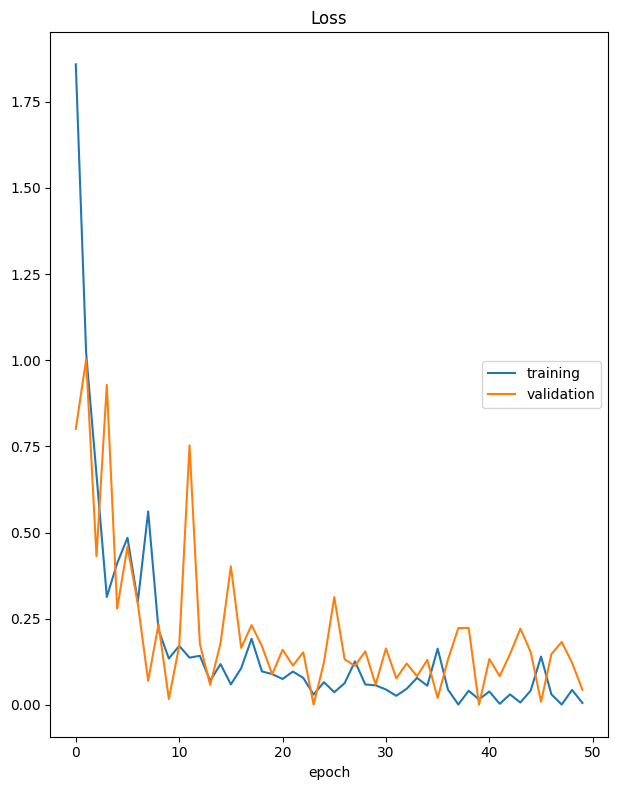

Loss
	training         	 (min:    0.001, max:    1.858, cur:    0.006)
	validation       	 (min:    0.000, max:    1.002, cur:    0.044)

Epoch 50: saving model to /kaggle/working/training/model.weights.h5
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056 - val_loss: 0.0438


In [39]:
his = model.fit(
    train_gen,
    epochs=50,
    batch_size=batch_size,
    validation_data=valid_gen,
    steps_per_epoch = train_gen.n // train_gen.batch_size,
    validation_steps = valid_gen.n // valid_gen.batch_size,
    verbose=1,
    callbacks=[PlotLossesKeras(), cp_callback]
)

In [32]:
model.save("/kaggle/working/Igpod_model.keras")